In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('height-weight.csv')

In [57]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [58]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


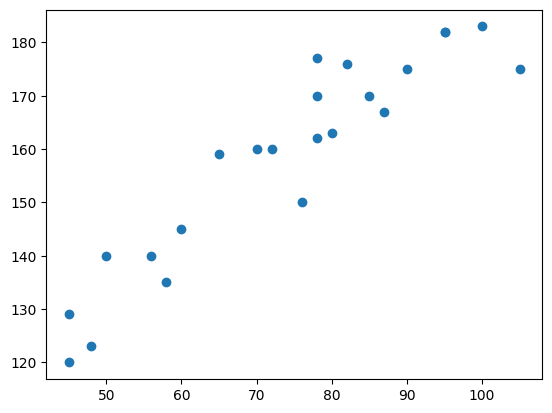

In [60]:
plt.scatter('Weight','Height',data=df)

In [61]:
## divide our dataset into independent and dependent edatures
X=df[['Weight']] ##independent feature
y=df['Height'] ##dependent feature

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,random_state=42)

In [63]:
print(X_train.shape,X_test.shape)

(18, 1) (5, 1)


In [64]:
## standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler

In [65]:
scaler=StandardScaler()

In [66]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

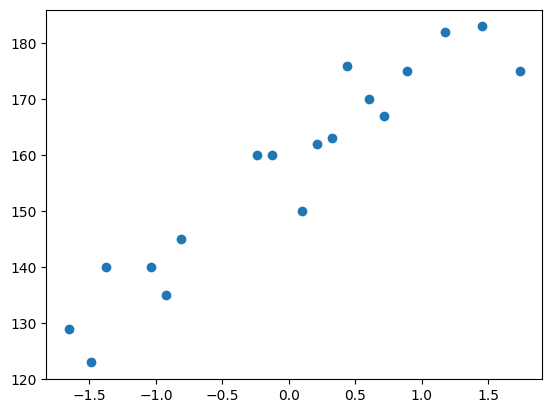

In [67]:
plt.scatter(X_train,Y_train)

In [68]:
## Train the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

In [69]:
model = LinearRegression()

In [70]:
model.fit(X_train,Y_train)

LinearRegression()

In [71]:
print("The slope or coefficient of weight is ",model.coef_)
print("Intercept:",model.intercept_)

The slope or coefficient of weight is  [17.03440872]
Intercept: 157.5


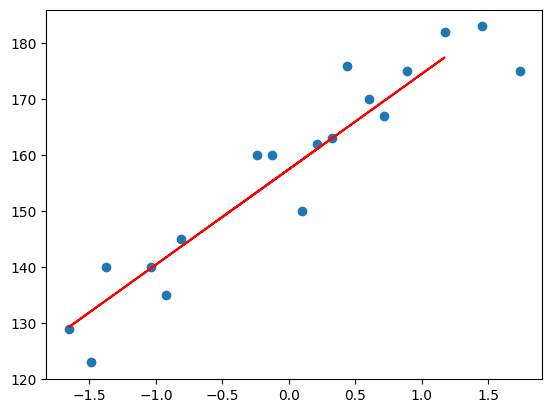

In [72]:
plt.scatter(X_train,Y_train)
plt.plot(X_test,model.predict(X_test),'r')

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [73]:
y_pred_test=model.predict(X_test)

In [74]:
y_pred_test,Y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

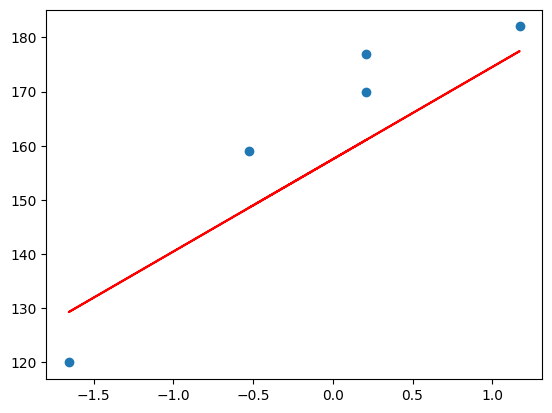

In [75]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,model.predict(X_test),'r')

## Performance Metrics

## MSE,MAE,RMSE
## R square and adjusted R square

In [76]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score

In [77]:
mse=mean_squared_error(Y_test,y_pred_test)
mae=mean_absolute_error(Y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [78]:
score=r2_score(Y_test,y_pred_test)
print(score)

0.776986986042344


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [79]:
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7026493147231252

In [80]:
## new data point weight is 80

scaled_weight=scaler.transform([[80]])
scaled_weight

c:\aditya\ML\CODE\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [81]:
scaled_weight[0]

array([0.32350772])

In [82]:
print("The height prediction for weight 80 kg is :",model.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [163.01076266]


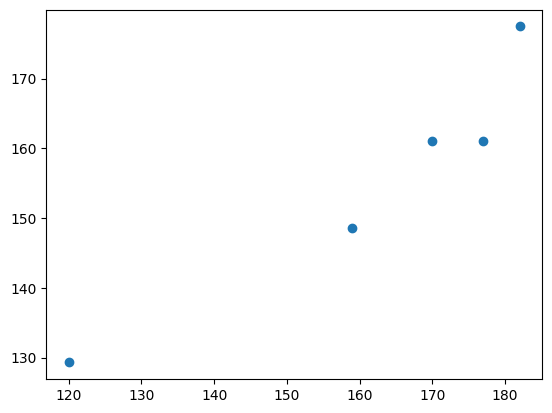

In [84]:
## Assumptions
## plot a scatter plot for the prediction
plt.scatter(Y_test,y_pred_test)

In [86]:
## Residuals
residuals=Y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\adity\AppData\Local\Temp\ipykernel_12516\2747191050.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

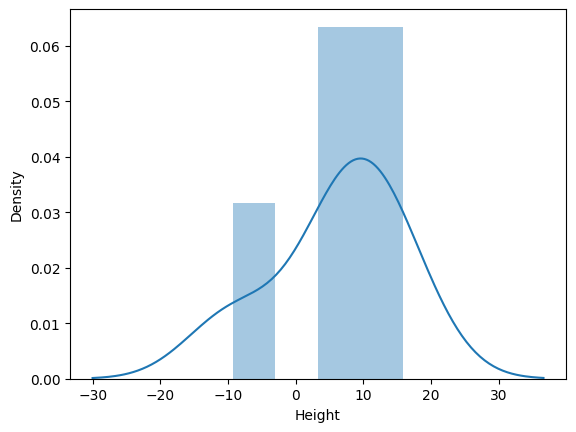

In [87]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

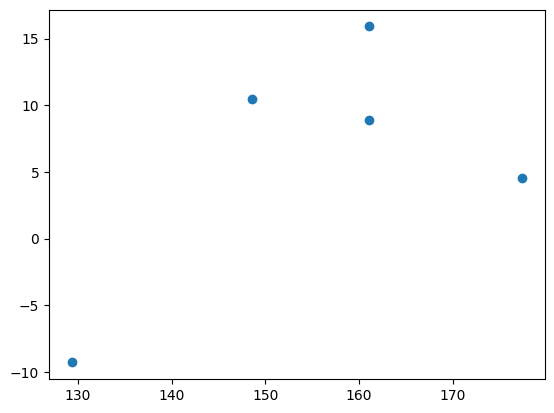

In [ ]:
## Scatter plot with respect to prediction and residuals
## uniform distribution   -> data points available here and there. both in positive and negative. so it is good
plt.scatter(y_pred_test,residuals)